<a href="https://colab.research.google.com/github/am7287/Animal-Species-Classification-using-Image-Data/blob/main/Classification_of_Animal_Species_Using_Image_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Done By:

*   RA2211003011050
*   RA2211003011053

*   RA2211003011056
*   RA2211003011063







ACCURACY FOR DECISION TREE

In [ ]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Set path to your dataset
dataset_path = "/content/drive/MyDrive/animals"
image_size = (64, 64)  # Resize images to a fixed size

# Load images and labels
def load_data(dataset_path):
    images = []
    labels = []
    for folder_name in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder_name)
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                img_path = os.path.join(folder_path, filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, image_size)
                images.append(img.flatten())  # Flatten image to a 1D array
                labels.append(folder_name)  # Label as the folder name
    return np.array(images), np.array(labels)

# Load the dataset
X, y = load_data(dataset_path)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dimensionality reduction using PCA
pca = PCA(n_components=100)  # Reduce to 100 principal components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_pca, y_train)

# Make predictions
y_pred = clf.predict(X_test_pca)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Optional: View the depth of the tree
print(f"Decision Tree Depth: {clf.get_depth()}")


Accuracy: 0.33
Decision Tree Depth: 23


ACCURACY FOR SVM

In [ ]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC  # Import Support Vector Classifier
from sklearn.metrics import accuracy_score

# Set path to your dataset
dataset_path = "/content/drive/MyDrive/animals"  # Update with your actual dataset path
image_size = (64, 64)  # Resize images to a fixed size

# Load images and labels
def load_data(dataset_path):
    images = []
    labels = []
    for folder_name in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder_name)
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                img_path = os.path.join(folder_path, filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, image_size)
                images.append(img.flatten())  # Flatten image to a 1D array
                labels.append(folder_name)  # Label as the folder name
    return np.array(images), np.array(labels)

# Load the dataset
X, y = load_data(dataset_path)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dimensionality reduction using PCA
pca = PCA(n_components=100)  # Reduce to 100 principal components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train an SVM Classifier
clf = SVC(kernel='linear', random_state=42)  # You can experiment with 'linear', 'rbf', or 'poly' kernels
clf.fit(X_train_pca, y_train)

# Make predictions
y_pred = clf.predict(X_test_pca)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Optional: View the support vectors
print(f"Number of support vectors: {len(clf.support_)}")


Accuracy: 0.40
Number of support vectors: 460


ACCURACY FOR K-MEANS CLUSTERING


In [ ]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans  # Import K-Means clustering
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Set path to your dataset
dataset_path = "/content/drive/MyDrive/animals"  # Update with your actual dataset path
image_size = (64, 64)  # Resize images to a fixed size

# Load images and labels
def load_data(dataset_path):
    images = []
    labels = []
    for folder_name in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder_name)
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                img_path = os.path.join(folder_path, filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, image_size)
                images.append(img.flatten())  # Flatten image to a 1D array
                labels.append(folder_name)  # Label as the folder name
    return np.array(images), np.array(labels)

# Load the dataset
X, y = load_data(dataset_path)

# Encode labels as integers for comparison
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Dimensionality reduction using PCA
pca = PCA(n_components=100)  # Reduce to 100 principal components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train K-Means Clustering
kmeans = KMeans(n_clusters=len(np.unique(y_encoded)), random_state=42)
kmeans.fit(X_train_pca)

# Predict clusters
y_pred = kmeans.predict(X_test_pca)

# Calculate accuracy (using label encoder to decode clusters)
accuracy = accuracy_score(y_test, y_pred)
print(f"Clustering accuracy (low due to unsupervised nature): {accuracy:.2f}")


Clustering accuracy (low due to unsupervised nature): 0.07


We can notice that SVM has the highest accuracy among Decision Tree and K-means clustering algorithms. So we are moving forward with SVM and executing the code with random images.

---OUTPUT---

Model accuracy: 0.45


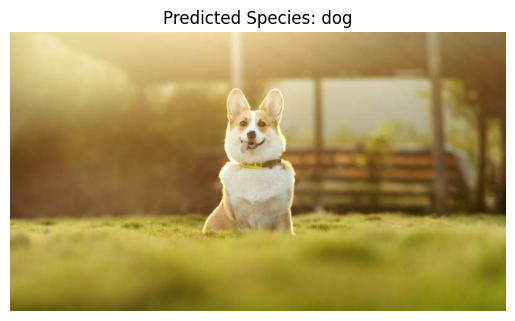

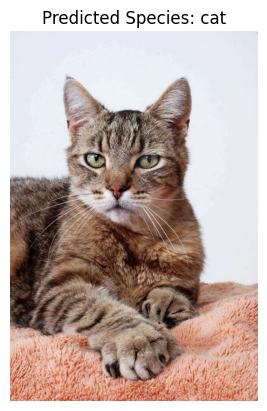

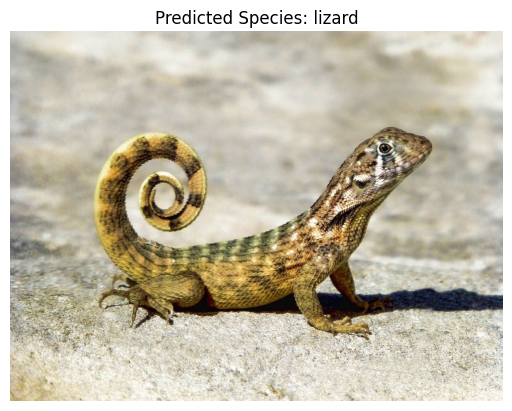

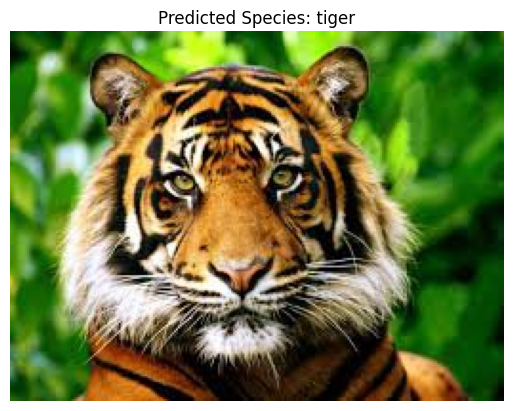

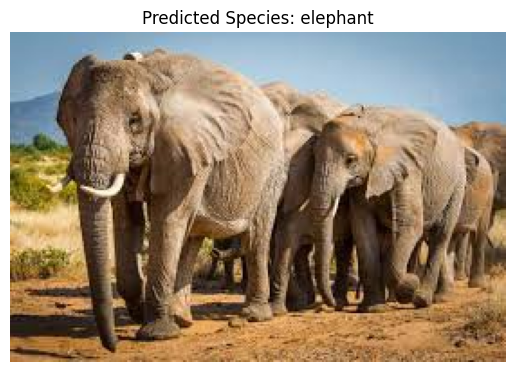

In [ ]:
import numpy as np
import cv2
import os
from sklearn.decomposition import PCA
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Set paths
extraction_dir = "/content/drive/MyDrive/animals"  # Use the directory where you extracted images
image_size = (64, 64)  # Resize images to a fixed size

# Step 1: Load images and labels
def load_data(dataset_path):
    images = []
    labels = []
    for folder_name in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder_name)
        if os.path.isdir(folder_path):  # Ensure it's a directory
            for filename in os.listdir(folder_path):
                img_path = os.path.join(folder_path, filename)
                img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Read the image in color
                if img is not None:
                    img = cv2.resize(img, image_size)
                    images.append(img.flatten())  # Flatten image to 1D
                    labels.append(folder_name)  # Use folder name as label
                else:
                    print(f"Warning: Unable to load image {img_path}")
    return np.array(images), np.array(labels)

# Load the dataset
X, y = load_data(extraction_dir)

# Step 2: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Dimensionality Reduction using PCA
pca = PCA(n_components=100)  # Reduce to 100 principal components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 4: Train SVM Classifier
clf = SVC(kernel='linear', random_state=42)  # You can experiment with other kernels like 'rbf', 'poly'
clf.fit(X_train_pca, y_train)

# Step 5: Test accuracy
y_pred = clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

# Step 6: Function to predict species from multiple images and display them
def predict_species_and_display_multiple(image_paths):
    for image_path in image_paths:
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Read image in color
        if img is not None:
            img_resized = cv2.resize(img, image_size).flatten().reshape(1, -1)  # Resize, flatten, and reshape
            img_pca = pca.transform(img_resized)  # Apply PCA transformation
            species = clf.predict(img_pca)[0]  # Predict species

            # Display the image with species name
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
            plt.title(f"Predicted Species: {species}")
            plt.axis('off')
            plt.show()
        else:
            print(f"Image {image_path} could not be loaded.")

# Example usage with a list of 5 image paths
image_paths = [
    "/content/drive/MyDrive/animals/dog/0a73823599.jpg",
    "/content/drive/MyDrive/animals/cat/0b54dde5f5.jpg",
    "/content/drive/MyDrive/animals/lizard/000d3a9260.jpg",
    "/content/drive/MyDrive/animals/tiger/0fdebd9663.jpg",
    "/content/drive/MyDrive/animals/elephant/032ef781ef.jpg"
]

predict_species_and_display_multiple(image_paths)


We have also shown the output for decision-tree with same images. The output is similar but less accurate.

----OUTPUT----

Model accuracy: 0.34


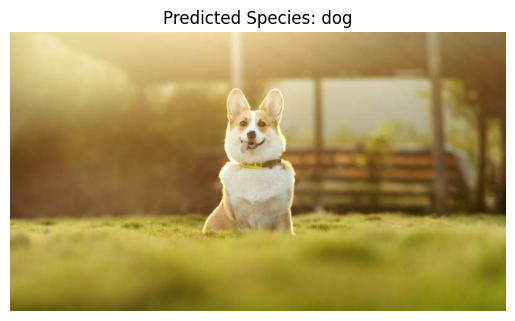

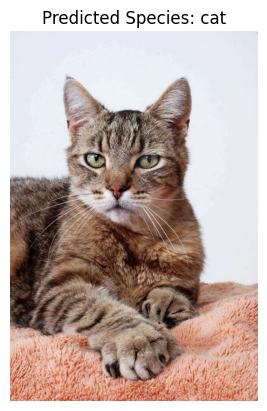

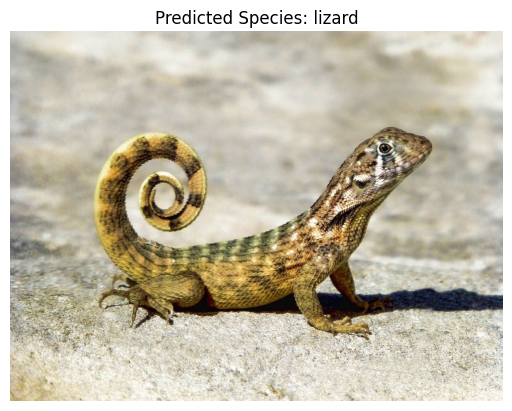

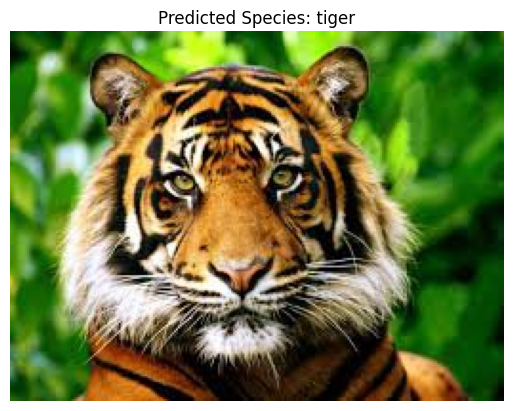

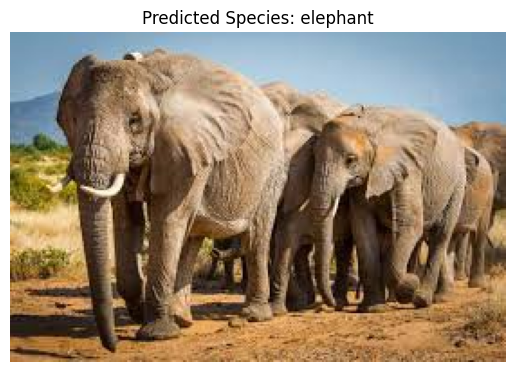

In [ ]:
import numpy as np
import cv2
import os
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Set paths
extraction_dir = "/content/drive/MyDrive/animals"  # Use the directory where you extracted images
image_size = (64, 64)  # Resize images to a fixed size

# Step 1: Load images and labels
def load_data(dataset_path):
    images = []
    labels = []
    for folder_name in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder_name)
        if os.path.isdir(folder_path):  # Ensure it's a directory
            for filename in os.listdir(folder_path):
                img_path = os.path.join(folder_path, filename)
                img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Read the image in color
                if img is not None:
                    img = cv2.resize(img, image_size)
                    images.append(img.flatten())  # Flatten image to 1D
                    labels.append(folder_name)  # Use folder name as label
                else:
                    print(f"Warning: Unable to load image {img_path}")
    return np.array(images), np.array(labels)

# Load the dataset
X, y = load_data(extraction_dir)

# Step 2: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Dimensionality Reduction using PCA
pca = PCA(n_components=100)  # Reduce to 100 principal components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 4: Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)  # Decision Tree model
clf.fit(X_train_pca, y_train)

# Step 5: Test accuracy
y_pred = clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

# Step 6: Function to predict species from multiple images and display them
def predict_species_and_display_multiple(image_paths):
    for image_path in image_paths:
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Read image in color
        if img is not None:
            img_resized = cv2.resize(img, image_size).flatten().reshape(1, -1)  # Resize, flatten, and reshape
            img_pca = pca.transform(img_resized)  # Apply PCA transformation
            species = clf.predict(img_pca)[0]  # Predict species

            # Display the image with species name
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
            plt.title(f"Predicted Species: {species}")
            plt.axis('off')
            plt.show()
        else:
            print(f"Image {image_path} could not be loaded.")

# Example usage with a list of 5 image paths
image_paths = [
    "/content/drive/MyDrive/animals/dog/0a73823599.jpg",
    "/content/drive/MyDrive/animals/cat/0b54dde5f5.jpg",
    "/content/drive/MyDrive/animals/lizard/000d3a9260.jpg",
    "/content/drive/MyDrive/animals/tiger/0fdebd9663.jpg",
    "/content/drive/MyDrive/animals/elephant/032ef781ef.jpg"
]

predict_species_and_display_multiple(image_paths)


For k-means clustering, since it is an unsupervised algorithm, we have obtained the wrong output for predicted species.

----OUTPUT----

Clustering accuracy (approximate): 0.18


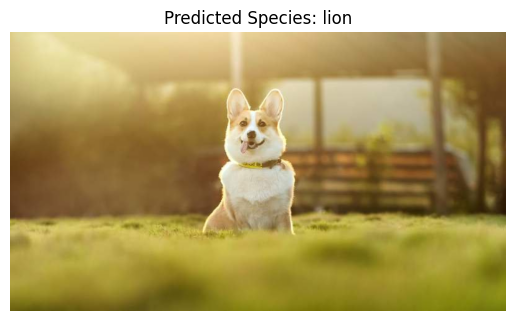

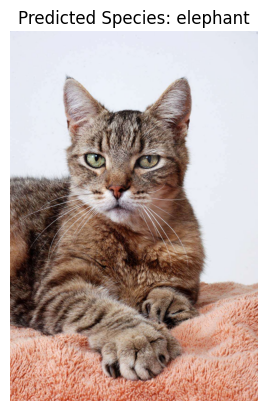

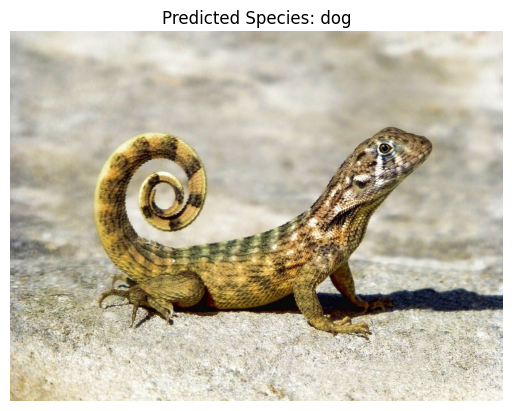

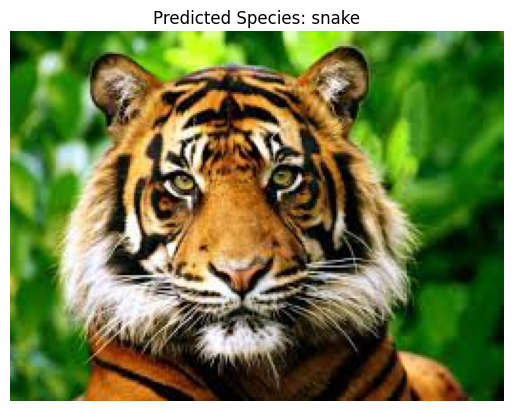

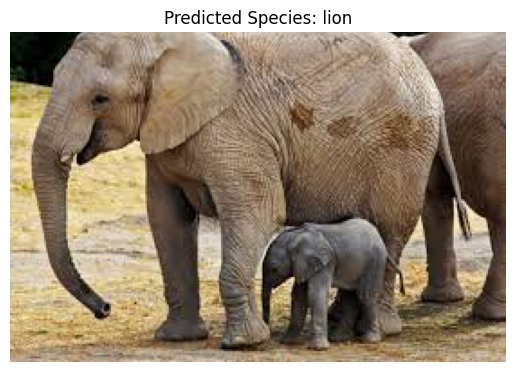

In [ ]:
import numpy as np
import cv2
import os
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans  # Import KMeans for clustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from collections import Counter

# Set paths
extraction_dir = "/content/drive/MyDrive/animals"  # Use the directory where you extracted images
image_size = (64, 64)  # Resize images to a fixed size
num_clusters = 5  # Set the number of clusters (adjust based on dataset)

# Step 1: Load images and labels
def load_data(dataset_path):
    images = []
    labels = []
    for folder_name in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder_name)
        if os.path.isdir(folder_path):  # Ensure it's a directory
            for filename in os.listdir(folder_path):
                img_path = os.path.join(folder_path, filename)
                img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Read the image in color
                if img is not None:
                    img = cv2.resize(img, image_size)
                    images.append(img.flatten())  # Flatten image to 1D
                    labels.append(folder_name)  # Use folder name as label
                else:
                    print(f"Warning: Unable to load image {img_path}")
    return np.array(images), np.array(labels)

# Load the dataset
X, y = load_data(extraction_dir)

# Step 2: Dimensionality Reduction using PCA
pca = PCA(n_components=100)  # Reduce to 100 principal components
X_pca = pca.fit_transform(X)

# Step 3: Apply K-Means Clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_pca)

# Step 4: Map K-Means clusters to actual labels
cluster_labels = {}
for i in range(num_clusters):
    cluster_indices = np.where(kmeans.labels_ == i)[0]
    actual_labels = y[cluster_indices]
    most_common_label = Counter(actual_labels).most_common(1)[0][0]
    cluster_labels[i] = most_common_label

# Step 5: Predict species for the test set and evaluate accuracy
y_pred = [cluster_labels[label] for label in kmeans.labels_]
accuracy = accuracy_score(y, y_pred)
print(f"Clustering accuracy (approximate): {accuracy:.2f}")

# Step 6: Function to predict species from multiple images and display them
def predict_species_and_display_multiple(image_paths):
    for image_path in image_paths:
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Read image in color
        if img is not None:
            img_resized = cv2.resize(img, image_size).flatten().reshape(1, -1)  # Resize, flatten, and reshape
            img_pca = pca.transform(img_resized)  # Apply PCA transformation
            cluster = kmeans.predict(img_pca)[0]  # Predict cluster
            species = cluster_labels[cluster]  # Map cluster to species

            # Display the image with species name
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
            plt.title(f"Predicted Species: {species}")
            plt.axis('off')
            plt.show()
        else:
            print(f"Image {image_path} could not be loaded.")

# Example usage with a list of 5 image paths
image_paths = [
    "/content/drive/MyDrive/animals/dog/0a73823599.jpg",
    "/content/drive/MyDrive/animals/cat/0b54dde5f5.jpg",
    "/content/drive/MyDrive/animals/lizard/000d3a9260.jpg",
    "/content/drive/MyDrive/animals/tiger/0fdebd9663.jpg",
    "/content/drive/MyDrive/animals/elephant/0e757af2d5.jpg"
]

predict_species_and_display_multiple(image_paths)


COMPARISON OF ACCURACIES USING BAR GRAPH

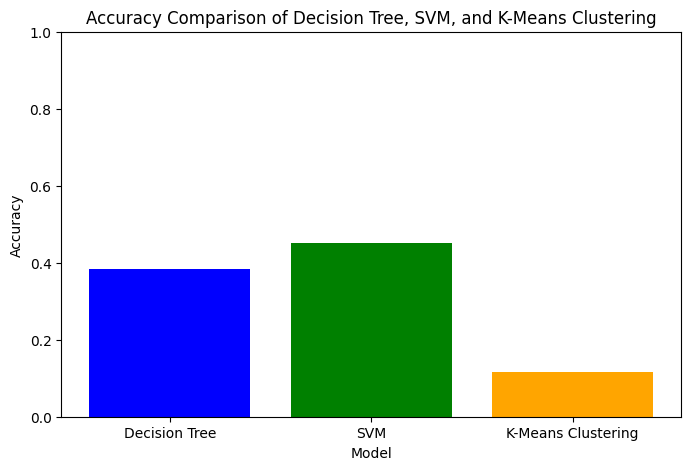

In [ ]:
# Load the dataset
X, y = load_data(extraction_dir)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dimensionality reduction using PCA
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize a dictionary to store accuracy scores
accuracy_scores = {}

# Model 1: Decision Tree
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train_pca, y_train)
y_pred_tree = clf_tree.predict(X_test_pca)
accuracy_scores['Decision Tree'] = accuracy_score(y_test, y_pred_tree)

# Model 2: SVM
clf_svm = SVC(kernel='linear', random_state=42)
clf_svm.fit(X_train_pca, y_train)
y_pred_svm = clf_svm.predict(X_test_pca)
accuracy_scores['SVM'] = accuracy_score(y_test, y_pred_svm)

# Model 3: K-Means Clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_train_pca)

# Map K-Means clusters to actual labels
cluster_labels = {}
for i in range(num_clusters):
    cluster_indices = np.where(kmeans.labels_ == i)[0]
    actual_labels = y_train[cluster_indices]
    most_common_label = Counter(actual_labels).most_common(1)[0][0]
    cluster_labels[i] = most_common_label

# Predict species for the test set using K-Means cluster labels
y_pred_kmeans = [cluster_labels[kmeans.predict([x])[0]] for x in X_test_pca]
accuracy_scores['K-Means Clustering'] = accuracy_score(y_test, y_pred_kmeans)

# Plot the accuracies
plt.figure(figsize=(8, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Decision Tree, SVM, and K-Means Clustering')
plt.ylim(0, 1)
plt.show()


COMPARISION OF CONFUSION MATRICES

Confusion Matrix for Decision Tree:
[[4 1 0 1 0 1 3 1 4 0]
 [1 3 2 1 0 0 0 0 0 2]
 [0 0 2 1 1 3 3 1 0 1]
 [1 0 1 4 1 0 0 1 1 0]
 [1 3 3 1 4 1 1 0 3 2]
 [0 2 1 1 0 4 1 0 1 1]
 [0 2 0 0 2 0 2 0 1 2]
 [1 1 0 1 1 1 1 4 0 0]
 [0 1 1 0 0 1 0 0 6 0]
 [1 0 2 0 0 2 1 3 1 7]]



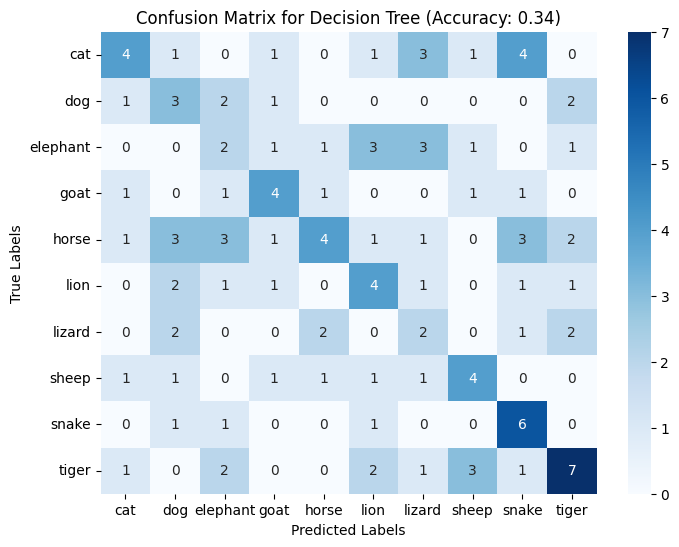

Confusion Matrix for SVM:
[[ 7  0  0  0  1  0  1  3  2  1]
 [ 0  5  1  0  0  1  0  2  0  0]
 [ 0  3  5  1  0  0  0  0  2  1]
 [ 1  0  1  4  0  1  0  1  1  0]
 [ 1  1  3  2  6  1  0  0  4  1]
 [ 0  3  0  0  1  5  0  0  2  0]
 [ 2  0  0  0  1  1  3  0  2  0]
 [ 1  0  0  2  1  1  0  5  0  0]
 [ 0  0  0  0  0  0  4  0  5  0]
 [ 1  1  1  0  0  2  1  0  0 11]]



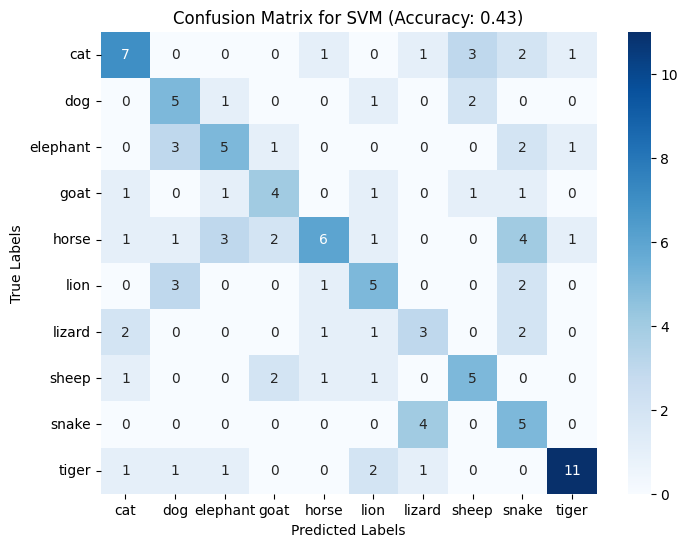

Confusion Matrix for K-Means Clustering:
[[0 4 0 3 0 0 7 0 1 0]
 [0 2 0 6 0 0 1 0 0 0]
 [0 1 0 5 0 0 5 0 1 0]
 [0 2 0 4 0 0 2 0 1 0]
 [0 6 0 6 0 0 5 0 2 0]
 [0 2 0 4 0 0 4 0 1 0]
 [0 4 0 1 0 0 1 0 3 0]
 [0 3 0 4 0 0 3 0 0 0]
 [0 2 0 1 0 0 2 0 4 0]
 [0 6 0 2 0 0 9 0 0 0]]



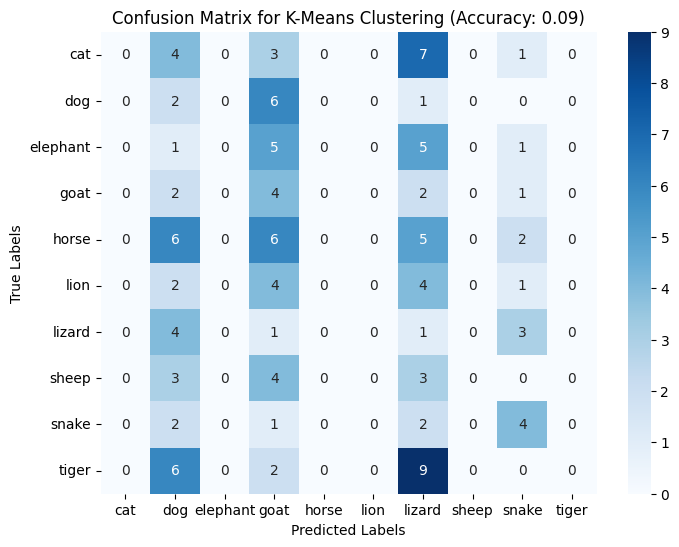

In [ ]:
import numpy as np
import cv2
import os
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set paths
extraction_dir = "/content/drive/MyDrive/animals"  # Update with your dataset path
image_size = (64, 64)
num_clusters = 5  # Set number of clusters for K-Means

# Step 1: Load images and labels
def load_data(dataset_path):
    images = []
    labels = []
    for folder_name in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder_name)
        if os.path.isdir(folder_path):  # Ensure it's a directory
            for filename in os.listdir(folder_path):
                img_path = os.path.join(folder_path, filename)
                img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Read the image in color
                if img is not None:
                    img = cv2.resize(img, image_size)
                    images.append(img.flatten())  # Flatten image to 1D
                    labels.append(folder_name)  # Use folder name as label
                else:
                    print(f"Warning: Unable to load image {img_path}")
    return np.array(images), np.array(labels)

# Load the dataset
X, y = load_data(extraction_dir)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dimensionality reduction using PCA
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize dictionary to store confusion matrices
confusion_matrices = {}

# Model 1: Decision Tree
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train_pca, y_train)
y_pred_tree = clf_tree.predict(X_test_pca)
confusion_matrices['Decision Tree'] = confusion_matrix(y_test, y_pred_tree)

# Model 2: SVM
clf_svm = SVC(kernel='linear', random_state=42)
clf_svm.fit(X_train_pca, y_train)
y_pred_svm = clf_svm.predict(X_test_pca)
confusion_matrices['SVM'] = confusion_matrix(y_test, y_pred_svm)

# Model 3: K-Means Clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_train_pca)

# Map K-Means clusters to actual labels
cluster_labels = {}
for i in range(num_clusters):
    cluster_indices = np.where(kmeans.labels_ == i)[0]
    actual_labels = y_train[cluster_indices]
    most_common_label = Counter(actual_labels).most_common(1)[0][0]
    cluster_labels[i] = most_common_label

# Predict species for the test set using K-Means cluster labels
y_pred_kmeans = [cluster_labels[kmeans.predict([x])[0]] for x in X_test_pca]
confusion_matrices['K-Means Clustering'] = confusion_matrix(y_test, y_pred_kmeans)

# Display confusion matrices for each model
for model_name, cm in confusion_matrices.items():
    print(f"Confusion Matrix for {model_name}:\n{cm}\n")
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.title(f'Confusion Matrix for {model_name} (Accuracy: {accuracy_scores[model_name]:.2f})')
    plt.show()
